First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   
1  0.085102 -0.255425  ...  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247676 -1.514654  ...  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3  0.377436 -1.387024  ... -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.270533  0.817739  ... -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28  Amo

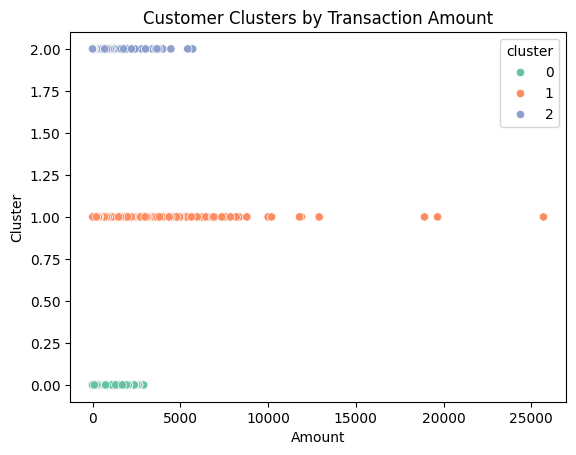


Potential Fraudulent Transactions:
            Time         V1         V2        V3        V4        V5  \
164        103.0  -6.093248 -12.114213 -5.694973  3.294389 -1.413792   
225        147.0  -2.687978   4.390230 -2.360483  0.360829  1.310192   
362        266.0  -2.564961   2.470985  2.649417 -1.564256  1.794297   
601        454.0  -3.133891   2.887394  2.178690 -1.576535  1.434510   
1086       835.0  -3.245399   4.821746 -2.824895  0.344042  0.953425   
...          ...        ...        ...       ...       ...       ...   
284393  172401.0  -4.571996   4.001637 -0.686328 -2.340542  1.680291   
284448  172454.0  -5.128786   4.434560 -1.152573 -2.357638  1.316643   
284649  172642.0 -11.946976   9.772660 -8.006237 -2.498596 -4.229520   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   

              V6        V7        V8        V9  ...       V23       V24  \
164     4.776000  4.8084

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from google.colab import files

# Upload the CSV file manually
uploaded = files.upload()

# Read the uploaded file
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    print(f"\nLoaded: {file_name}")

# Inspect data
print("First few rows:")
print(df.head())
print("\nInfo:")
print(df.info())

# Handle missing values
df = df.dropna()

# Convert date column if it exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Visualization: Total amount over time
if 'date' in df.columns and 'Amount' in df.columns:
    df.set_index('date')['Amount'].resample('M').sum().plot()
    plt.title("Monthly Transaction Volume")
    plt.ylabel("Total Amount")
    plt.xlabel("Date")
    plt.show()

# Clustering: Customer behavior profiling
if 'Amount' in df.columns:
    X = df_encoded.select_dtypes(include='number')
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    # Plot clusters
    sns.scatterplot(x=df['Amount'], y=df['cluster'], hue=df['cluster'], palette="Set2")
    plt.title("Customer Clusters by Transaction Amount")
    plt.xlabel("Amount")
    plt.ylabel("Cluster")
    plt.show()

    # Fraud Detection using Isolation Forest
    iso = IsolationForest(contamination=0.01, random_state=42)
    df['is_fraud'] = iso.fit_predict(X_scaled)
    df['is_fraud'] = df['is_fraud'].map({1: 0, -1: 1})  # 1 = Fraudulent

    print("\nPotential Fraudulent Transactions:")
    print(df[df['is_fraud'] == 1])

    # Export full dataset with labels
    output_filename = "processed_data_with_clusters_and_fraud.csv"
    df.to_csv(output_filename, index=False)
    files.download(output_filename)

    # Export only fraudulent transactions
    fraud_filename = "fraudulent_transactions.csv"
    df[df['is_fraud'] == 1].to_csv(fraud_filename, index=False)
    files.download(fraud_filename)

else:
    print("Column 'Amount' not found for clustering and fraud detection.")

In [7]:
for file_name in uploaded.keys():
    df = pd.read_csv(creditcard.csv.zip)
    print(f"\nLoaded: {creditcard.csv.zip}")

In [8]:
print(df.head())  # Shows first 5 rows

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   
1  0.085102 -0.255425  ...  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247676 -1.514654  ...  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3  0.377436 -1.387024  ... -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.270533  0.817739  ... -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28  Amount  Class  clus